In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [2]:
data= pd.read_excel('voetbal.xlsx')

In [3]:
start = pd.to_datetime('2011-01-01')
end = pd.to_datetime('2011-12-31')
start_u = start.value//10**9
end_u = end.value//10**9

data['inzet'] = ''
for x, row in data.iterrows():
    y = (pd.to_datetime(np.random.randint(start_u, end_u), unit='s'))
    data.at[x,'geboortedatum'] = datetime.date(y.year,y.month,y.day)
    
    if y < pd.to_datetime('2011-04-01'):
        data.at[x, 'inzet'] = 'zeer goed'
    elif y < pd.to_datetime('2011-10-01'):
        data.at[x, 'inzet'] = 'goed'
    else:
        data.at[x, 'inzet'] = 'matig'
data.head()

,naam,naam.1,positie,aantal gemaakte goalen,geboortedatum,inzet,gewicht,lengte
0,speler1,speler1,staart,1,2011-04-13,goed,25.3,123
1,speler2,speler2,staart,0,2011-12-11,matig,29.2,134
2,speler3,speler3,linkervleugel,1,2011-01-04,zeer goed,22.8,116
3,speler4,speler4,rechtervleugel,0,2011-02-19,zeer goed,23.2,121
4,speler5,speler5,piloot,6,2011-05-20,goed,24.5,121


In [4]:
gewicht_gesorteerd = sorted(set(data.gewicht))

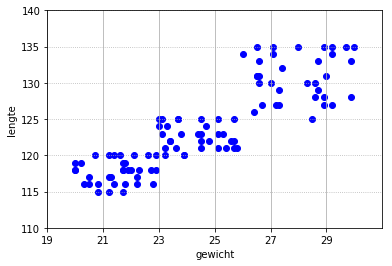

In [5]:
for x in gewicht_gesorteerd:
    y=data[data.gewicht==x]
    plt.scatter(y.gewicht, y.lengte, c='b')
plt.xlim(19,31)
plt.ylim(110,140)
plt.xlabel('gewicht')
plt.ylabel('lengte')
plt.grid(True, axis='x')
plt.grid(True, axis='y', linestyle=':')
plt.xticks(np.arange(19,31,step=2))
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

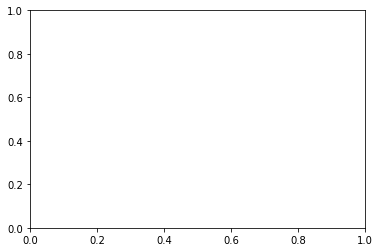

In [13]:
# set width of bar
barWidth = 0.2

# divide categories
cat1= data[pd.to_datetime(data.geboortedatum) < pd.to_datetime('2011-04-01')]
cat2= data[(pd.to_datetime('2011-04-01')<=pd.to_datetime(data.geboortedatum)) & (pd.to_datetime(data.geboortedatum)< pd.to_datetime('2011-07-01'))]
cat3= data[(pd.to_datetime('2011-07-01')<=pd.to_datetime(data.geboortedatum)) & (pd.to_datetime(data.geboortedatum) < pd.to_datetime('2011-10-01'))]
cat4= data[pd.to_datetime(data.geboortedatum) >= pd.to_datetime('2011-10-01')]


# set height of bar
bars1={}
bars2={}
bars3={}
bars4={}
for position in data['positie']:
    bars1[position]=0
    bars2[position]=0
    bars3[position]=0
    bars4[position]=0
for x, row in cat1.iterrows():
    position=cat1.at[x, 'positie']
    bars1[position]=bars1[position]+ cat1.at[x, 'aantal gemaakte goalen']
for x, row in cat2.iterrows():
    position=cat2.at[x, 'positie']
    bars2[position]=bars2[position]+ cat2.at[x, 'aantal gemaakte goalen']
for x, row in cat3.iterrows():
    position=cat3.at[x, 'positie']
    bars3[position]=bars3[position]+ cat3.at[x, 'aantal gemaakte goalen']
for x, row in cat4.iterrows():
    position=cat4.at[x, 'positie']
    bars4[position]=bars4[position]+ cat4.at[x, 'aantal gemaakte goalen']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='geboortecategorie 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='geboortecategorie 2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='geboortecategorie 3')
plt.bar(r4, bars3, color='#ffffff', width=barWidth, edgecolor='white', label='geboortecategorie 4')
 
# Add xticks on the middle of the group bars
plt.xlabel('positie', fontweight='bold')
plt.ylabel('aantal goals')
plt.xticks([r + barWidth for r in range(len(bars1))], bars1.keys())
 
# Create legend & Show graphic
plt.legend()
plt.show()
